Problem Statement -

Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp.
You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)  The repository has several datasets.
For this case study, we are using the Electronics dataset.

Please do the analysis based on steps( 1 to 8) as given below - 

Steps -

1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or 
                                                              more number of ratings )
3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error 
                           (like RMSE) on predictions made on the test data.) You can also use a different method to 
                            evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,
    we will recommend 5 new products.
8. Summarise your insights.
 
Please Note - 

If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.
If you are stuck at the model evaluation part of this project.

Please refer to below links - 

https://surprise.readthedocs.io/en/stable/accuracy.html
http://surpriselib.com/ - Getting started, example
    



In [77]:
%matplotlib inline 
import numpy as np
import pandas as pd

In [2]:
#Read and explore the given dataset
colnames = ['userId', 'productId', 'ratings', 'timestamp']
Rating = pd.read_csv("ratings_Electronics.csv",names= colnames)

In [3]:
Rating.head(5)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
Rating.drop(columns=['timestamp'],inplace=True)

In [6]:
Rating.shape

(7824482, 3)

In [7]:
#Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or 
#                                                              more number of ratings )
count2 = Rating['userId'].value_counts()

In [8]:
Rating_new = Rating[Rating['userId'].isin(count2[count2 >= 50].index)]

In [9]:
Rating_new.shape

(125871, 3)

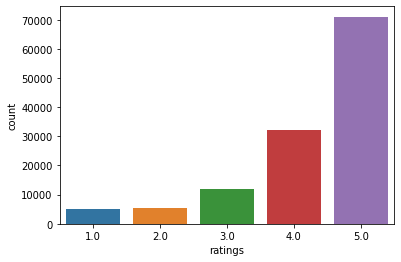

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(data=Rating_new,x='ratings')
plt.show()

In [11]:
#Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
#Splitting will be done while creating collaborative filtering model

In [12]:
#I don't think splitting is needed for building a recommendation system as suggested by Sunil Sir.

In [13]:
#Build Popularity Recommender model.

In [14]:
Rating_new.head(5)

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [15]:
Rating_new.groupby('productId')['ratings'].mean().head()  

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [16]:
Rating_new.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [17]:
Rating_new.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [18]:
Rating_new_mean = pd.DataFrame(Rating_new.groupby('productId')['ratings'].mean()) 

In [19]:
Rating_new_mean['rating_counts'] = pd.DataFrame(Rating_new.groupby('productId')['ratings'].count())  

In [20]:
Rating_new_mean.head()  

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [21]:
#Build Collaborative Filtering model.

In [22]:
Rating_new.head(5)

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [23]:
Rating_new.userId = Rating_new.userId.astype(str)

/Users/anuprankumar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
Rating_new.productId = Rating_new.productId.astype(str)

In [25]:
Rating_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 3 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 8.8+ MB


In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
#Both UserId and ProductId are object type. Thus we can proceed with model building

In [28]:
Rating_new['userId'].unique()

array(['A3BY5KCNQZXV5U', 'AT09WGFUM934H', 'A32HSNCNPRUMTR', ...,
       'AT53ZTTO707MB', 'A1X3ESYZ79H59E', 'A328S9RN3U5M68'], dtype=object)

In [29]:
Rating_new['userId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
AY4EXFOO43C3S      50
A16RL0RMRF974O     50
A2ER8G4JJJ7XER     50
A2NXRD80LWHUOP     50
A3EHJ5519LG7TR     50
Name: userId, Length: 1540, dtype: int64

In [30]:
Rating_new['userId'].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

In [31]:
Rating_new['userId'].value_counts().tail()

AY4EXFOO43C3S     50
A16RL0RMRF974O    50
A2ER8G4JJJ7XER    50
A2NXRD80LWHUOP    50
A3EHJ5519LG7TR    50
Name: userId, dtype: int64

In [32]:
import io
import os
import numpy as np
from surprise import Dataset,Reader

In [33]:
import surprise

In [34]:
reader = Reader(rating_scale=(1,5))

In [40]:
data = Dataset.load_from_df(Rating_new[['userId' , 'productId' , 'ratings']], reader)

In [41]:
data

In [43]:
from surprise.model_selection import train_test_split

In [90]:
#Splitting the data into training and test set in 70/30 ratio
trainset,testset = train_test_split(data,test_size = 0.05,random_state=123)

In [91]:
type(trainset)

surprise.trainset.Trainset

In [92]:
user_records = trainset.ur

In [93]:
type(user_records)

collections.defaultdict

In [94]:
for keys in user_records.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [95]:
user_records[0]

[(0, 5.0),
 (584, 5.0),
 (1913, 5.0),
 (3981, 4.0),
 (4397, 5.0),
 (129, 5.0),
 (211, 5.0),
 (6720, 5.0),
 (1216, 3.0),
 (1511, 4.0),
 (3729, 5.0),
 (11294, 4.0),
 (5122, 5.0),
 (11981, 5.0),
 (11669, 5.0),
 (13206, 5.0),
 (1642, 3.0),
 (2002, 5.0),
 (11033, 5.0),
 (336, 4.0),
 (15577, 5.0),
 (16190, 1.0),
 (4482, 4.0),
 (766, 5.0),
 (16700, 5.0),
 (17902, 5.0),
 (623, 5.0),
 (3058, 3.0),
 (7104, 5.0),
 (19538, 4.0),
 (1209, 4.0),
 (926, 5.0),
 (6246, 5.0),
 (21078, 4.0),
 (21990, 5.0),
 (22708, 3.0),
 (7687, 4.0),
 (23749, 5.0),
 (1120, 5.0),
 (319, 5.0),
 (4478, 5.0),
 (28009, 3.0),
 (28160, 4.0),
 (7236, 4.0),
 (28479, 5.0),
 (602, 5.0),
 (28789, 5.0),
 (14440, 5.0),
 (30192, 5.0),
 (136, 4.0),
 (248, 5.0),
 (5748, 5.0),
 (25764, 3.0),
 (16566, 5.0),
 (662, 5.0),
 (11409, 3.0),
 (281, 5.0),
 (4113, 5.0),
 (5172, 5.0),
 (3096, 5.0),
 (24734, 4.0),
 (13437, 3.0),
 (14453, 5.0),
 (9965, 5.0),
 (6128, 5.0),
 (8874, 5.0),
 (12362, 5.0),
 (37009, 4.0),
 (29996, 5.0),
 (37847, 4.0),
 (3810

In [96]:
print(trainset.to_raw_uid(662))

AP2NZAALUQKF5


In [97]:
print(trainset.to_raw_iid(662))

B002V88HFE


In [98]:
from surprise import KNNWithMeans

In [99]:
from surprise import accuracy

In [100]:
from surprise import Prediction

In [101]:
algo = KNNWithMeans(51,sim_options ={'name' : 'pearson', 'user-based' : False})

In [102]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [103]:
len(testset)

6294

In [104]:
test_pred = algo.test(testset)

In [105]:
#Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error 
#                           (like RMSE) on predictions made on the test data.) You can also use a different method to 
#                           evaluate the models.

In [106]:
accuracy.rmse(test_pred)

RMSE: 1.0518


1.0518325243555124

In [107]:
test_pred[12]

Prediction(uid='A3BKNXX8QFIXIV', iid='B0097FZRYI', r_ui=5.0, est=4.485350408445609, details={'actual_k': 2, 'was_impossible': False})

In [108]:
test_pred_df = pd.DataFrame(test_pred)

In [109]:
test_pred_df

,uid,iid,r_ui,est,details
0,A2NOW4U7W3F7RI,B004QQZKP4,5.0,4.261514,"{'was_impossible': True, 'reason': 'User and/o..."
1,AEJAGHLC675A7,B005K2X8L6,4.0,4.858532,"{'actual_k': 2, 'was_impossible': False}"
2,A32O5FZH994CNY,B00B7MZCUI,5.0,4.667131,"{'actual_k': 1, 'was_impossible': False}"
3,ADKZOXAOV8EXD,B006YTZUA6,2.0,4.011765,"{'actual_k': 0, 'was_impossible': False}"
4,A1MFPAM9TTRTXN,B0065DUJ0C,5.0,4.928571,"{'actual_k': 0, 'was_impossible': False}"
...,...,...,...,...,...
6289,A1522TN5FVJL0Y,B003VAHYNC,4.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
6290,A33YZNZIRA3H97,B000FFIYOO,4.0,4.261514,"{'was_impossible': True, 'reason': 'User and/o..."
6291,A19XPAWSWDRI3B,B000YMJ6ZE,3.0,4.261514,"{'was_impossible': True, 'reason': 'User and/o..."
6292,A14I1F2H7NOYDC,B000CHVLQS,5.0,4.261514,"{'was_impossible': True, 'reason': 'User and/o..."


In [110]:
algo.predict(uid='A2ED50E3KWKUKW',iid='B0015VW3BM')

Prediction(uid='A2ED50E3KWKUKW', iid='B0015VW3BM', r_ui=None, est=5, details={'actual_k': 1, 'was_impossible': False})

In [111]:
testset_new = trainset.build_anti_testset() 

In [112]:
len(testset_new)

71704483

In [113]:
testset_new[0:4]

[('AAQ9NJ480N9W5', 'B004UL34EY', 4.261513501760372),
 ('AAQ9NJ480N9W5', 'B00005105N', 4.261513501760372),
 ('AAQ9NJ480N9W5', 'B000EGQS5G', 4.261513501760372),
 ('AAQ9NJ480N9W5', 'B0012XAUS6', 4.261513501760372)]

In [114]:
predictions = algo.test(testset_new[0:1000])

In [115]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [116]:
predictions_df.head(5)

,0,1,2
0,AAQ9NJ480N9W5,B004UL34EY,3.526882
1,AAQ9NJ480N9W5,B00005105N,4.516129
2,AAQ9NJ480N9W5,B000EGQS5G,4.516129
3,AAQ9NJ480N9W5,B0012XAUS6,4.516129
4,AAQ9NJ480N9W5,B000AP05BO,5.000000


In [117]:
predictions_df.columns = ['userId' , 'productId' , 'ratings']

In [118]:
predictions_df.head(5)

,userId,productId,ratings
0,AAQ9NJ480N9W5,B004UL34EY,3.526882
1,AAQ9NJ480N9W5,B00005105N,4.516129
2,AAQ9NJ480N9W5,B000EGQS5G,4.516129
3,AAQ9NJ480N9W5,B0012XAUS6,4.516129
4,AAQ9NJ480N9W5,B000AP05BO,5.000000


In [119]:
predictions_df.sort_values(by = ['userId','productId'],ascending = False,inplace = True)

In [125]:
predictions_df.head(5)

,userId,productId,ratings
753,AAQ9NJ480N9W5,B00L2442H0,4.516129
643,AAQ9NJ480N9W5,B00KNM763E,3.061216
153,AAQ9NJ480N9W5,B00K7O2DJU,4.516129
378,AAQ9NJ480N9W5,B00JF0D7RE,4.516129
482,AAQ9NJ480N9W5,B00JC3G4ZQ,4.516129


In [121]:
#Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,
#    we will recommend 5 new products.

In [129]:
top_5_recom = predictions_df.groupby("userId").head(5).reset_index(drop=True)

In [130]:
#we used the item based approach to predict the top 5 products for a userid. Same process can be done using user based approach
top_5_recom

,userId,productId,ratings
0,AAQ9NJ480N9W5,B00L2442H0,4.516129
1,AAQ9NJ480N9W5,B00KNM763E,3.061216
2,AAQ9NJ480N9W5,B00K7O2DJU,4.516129
3,AAQ9NJ480N9W5,B00JF0D7RE,4.516129
4,AAQ9NJ480N9W5,B00JC3G4ZQ,4.516129


In [37]:
#Summarise your insights.